# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

For this assignment, you will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, you must modify the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  In some ways, this will be simpler than the
Tic-Tac-Toe code.  

Steps required to do this include the following:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $-1$ to each move unless it is a move to the goal state, for which the reinforcement is $0$.  This represents the goal of finding the shortest path to the goal.

Make a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
as in the Tic-Tac-Toe code.

## Requirements

First, how should we represent the state of this puzzle?  We need to keep track of which disks are on which pegs. Name the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest. The set of disks on a peg can be represented as a list of integers.  Then the state can be a list of three lists.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `stateMoveTuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

# Examples (more coming soon)

To make it easier to visualize the state of the game, the function *printState* is used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import copy

## Print state
This function is used to give a grafical representation of a certain state in the Hannoi Towers game.


In [2]:
def printState(state):
    import copy
    
    stateCopy = copy.deepcopy(state)
    for peg in stateCopy:
        numberDisks=len(peg)
        for pos in range(3-len(peg)):
            peg.insert(pos,' ')
            
    print stateCopy[0][0],stateCopy[1][0],stateCopy[2][0]
    print stateCopy[0][1],stateCopy[1][1],stateCopy[2][1]
    print stateCopy[0][2],stateCopy[1][2],stateCopy[2][2]
    print '------'

In [3]:
state = [[1, 2,3], [], []]
printState(state)


1    
2    
3    
------


## Valid moves
The function *validMoves* returns list of moves that are valid from a certain state.
The list returned consists of pairs containing the number of the disk and the peg to which it can be moved.

The following is the list of rules:
- Only one disk can be moved at a time.
- Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack.
- No disk may be placed on top of a smaller disk.



In [4]:
#returns list of moves that are valid from state
def validMoves(state):
    validMoves=[]
    #for each peg 
    for p in range(3):
        if len(state[p]) >0:
            for q in range(3):
                if p==q:
                    continue
                else:
                    if len(state[q])>0:
                        if state[p][0] < state[q][0]:
                            validMoves.append([p+1,q+1])
                    else:
                        validMoves.append([p+1,q+1]) 
    return validMoves

In [5]:
state = [[1], [2], [3]]

validMoves(state)

[[1, 2], [1, 3], [2, 3]]

In this case, the valid moves that can be perfomed are:
- move the dist 1 to the peg 2
- move the dist 1 to the peg 3
- move the dist 2 to the peg 3

Disk 3 can not be moved to any other peg because the value is greater than the disks in the other pegs.


 ## Make move
 The function `makeMove(state, move)` returns new (copy of) state after move has been applied.


In [6]:
def makeMove(state, move):
    import copy
    newState=copy.deepcopy(state)
    disk=move[0]
    peg=move[1]
    del newState[disk-1][0]
    newState[peg-1].insert(0,state[disk-1][0])    
    return newState

In the following example, the disk 1 is moved to peg 3

In [7]:
state = [[1,2,3], [], []]
print("Initial state")
printState(state)

print "Valid Moves: ",validMoves(state)
move=validMoves(state)[1]
print "Applying move: ",move
newState=makeMove(state, move)
print ("")
print ("New state")
printState(newState)



Initial state
1    
2    
3    
------
Valid Moves:  [[1, 2], [1, 3]]
Applying move:  [1, 3]

New state
     
2    
3   1
------


## StateMove Tuple
The funtion `stateMoveTuple(state, move)` returns tuple of state and move. It is used to create a tuple with a certain state and move to be able to insert it later as a key in the Q dictionary.

In [8]:
def stateMoveTuple(state, move):
    import copy
    newState=copy.deepcopy(state)
    newTuple=[]
    
    for l in range(len(state)):
        newTuple.append(tuple(newState[l]))
    return tuple((tuple(newTuple),tuple(move)))

In the this example, a tuple is made with the following state and move:  

In [9]:
state = [[1,2,3], [], []]
move =[1, 2]
stateMoveTuple(state, move)


(((1, 2, 3), (), ()), (1, 2))

## Winner
This function is used to determine if a goal state was reached. A goal state will be found if the 3 disks are in the third peg, ordered starting with the smallest one and ending with the biggest one. This logic is considering that the start state will always be all the disks in the first peg.

In [10]:
def winner(state):
    disks_in_right_pos_1=0
    disks_in_right_pos_2=0
    for i in range(3):
        #if len(state[1]) ==3 and state[1][i]==i+1:
         #   disks_in_right_pos_1+=1
        if len(state[2]) ==3 and state[2][i]==i+1:
            disks_in_right_pos_2+=1
    return True if disks_in_right_pos_1 ==3 or disks_in_right_pos_2 ==3 else  False
            

In the following examples, a goal state is found because all the disks are ordered in the second or third peg.

In [11]:
state = [ [], [],[1,2,3]]
printState(state)
print ("Win state ? ",winner(state))
     

    1
    2
    3
------
('Win state ? ', True)


## EpsilonGreedy
This functions is used to decide whereas to take a random move with uniform distribution or a move based on the experience of the Q table.
The random move will be selected with a probability equals to the value of the epsiolon that comes as a paramether, so the move based on the experience will be selected with 1-epsilon probability. 

If the move based on the experience is selected, the function will get all tuples from the Q table in which the value of move is a valid move for that state, and from that list will select the tuple with a higher value, it means, the one with more probabilities to route to the goal state. 

In [12]:
def epsilonGreedy(epsilon, Q, state,validMovesF):
    import numpy as np
    bestMove=[]
    validMovesList = validMovesF(state)
    
    if np.random.uniform() < epsilon:
        return validMovesList[np.random.choice(len(validMovesList))]
    else:        
        Qs = np.array([Q.get(tuple(stateMoveTuple(state, m)), 0) for m in validMovesList]) 
        bestMove = validMovesList[np.argmax(Qs)]

        return bestMove

## TrainQ
This function is used to add tuples of state and moves to the Q table with a reinforcement value indicating how far is that tuple from the goal state.Every time a new tuple is added to the dictionary, a reinforcement value of -1 is assigned to it.

The learningRate represents how much the new reinforcement value will change the current value for a certain state.If a value of  0  is used, no learning will be added because it will not affect the current value, and if a  factor of 1 is used, then the algorithm will consider only the most recent values added.

In [20]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor,validMovesF, makeMoveF, winnerF=winner, st=[[1,2,3], [], []]):
    import copy
    import numpy as np

    
    steps=[]
    maxGames = nRepetitions
    rho = learningRate
    epsilonDecayRate=epsilonDecayFactor
    epsilon = 1.0 
    
    Q = {}
    for nGames in range(maxGames):
        epsilon *= epsilonDecayRate
        step = 0
        state=st 
        done = False
        
        while not done:
            step += 1
            move = epsilonGreedy(epsilon, Q, state,validMovesF)
            stateNew=makeMoveF(state, move)
            
            #if state being explored not in dictionary
            if tuple(stateMoveTuple(state, move)) not in Q:
                Q[tuple(stateMoveTuple(state, move))] = -1  # initial Q value for new state,move
                
            if winnerF(stateNew):
                Q[tuple(stateMoveTuple(state, move))] = 0  
                done = True

             #If nobody won yet, let's calculate the temporal difference error and use it to adjust the Q value 
            #of the previous state,move. We do this only if we are not at the first move of a game.   
            if step > 1:
                Q[tuple(stateMoveTuple(stateOld, moveOld))] += rho * (-1+Q[tuple(stateMoveTuple(state, move))] - Q[tuple(stateMoveTuple(stateOld, moveOld))])

            stateOld=copy.deepcopy(state)   
            moveOld = copy.deepcopy(move) # remember state and move to Q(state,move) can be updated after next steps
            state = copy.deepcopy(stateNew)

                
        steps.append(step)
    
   
    return Q,steps   
    


In [48]:
Q, stepsToGoal = trainQ(1000, 0.2, 0.999, validMoves, makeMove)
print (stepsToGoal)


[123, 294, 263, 279, 19, 124, 208, 319, 85, 160, 22, 200, 47, 66, 97, 29, 108, 131, 63, 59, 14, 254, 36, 43, 128, 42, 42, 27, 404, 76, 46, 206, 50, 72, 91, 36, 47, 26, 281, 46, 288, 75, 139, 112, 46, 39, 81, 73, 30, 187, 31, 53, 235, 39, 36, 87, 47, 58, 81, 90, 20, 58, 19, 22, 77, 12, 163, 45, 241, 287, 54, 45, 52, 14, 70, 41, 26, 47, 83, 10, 20, 201, 65, 45, 30, 62, 114, 179, 43, 41, 18, 204, 132, 27, 22, 72, 13, 64, 34, 12, 156, 62, 80, 12, 39, 22, 70, 41, 189, 45, 128, 70, 49, 30, 57, 28, 37, 37, 52, 113, 25, 97, 40, 13, 75, 13, 52, 15, 14, 33, 72, 24, 53, 44, 70, 113, 73, 149, 25, 32, 108, 30, 42, 18, 95, 160, 13, 13, 46, 42, 62, 54, 58, 42, 23, 18, 67, 15, 49, 32, 103, 95, 55, 13, 41, 26, 141, 13, 39, 55, 59, 109, 37, 53, 25, 33, 61, 31, 101, 41, 41, 104, 28, 40, 40, 41, 29, 47, 37, 23, 32, 77, 10, 25, 70, 25, 30, 28, 22, 9, 26, 40, 50, 20, 23, 44, 49, 17, 86, 21, 41, 19, 45, 26, 31, 16, 62, 14, 32, 45, 33, 105, 41, 51, 22, 10, 66, 22, 77, 23, 40, 55, 26, 16, 23, 62, 21, 15, 25, 1

# Plotting 

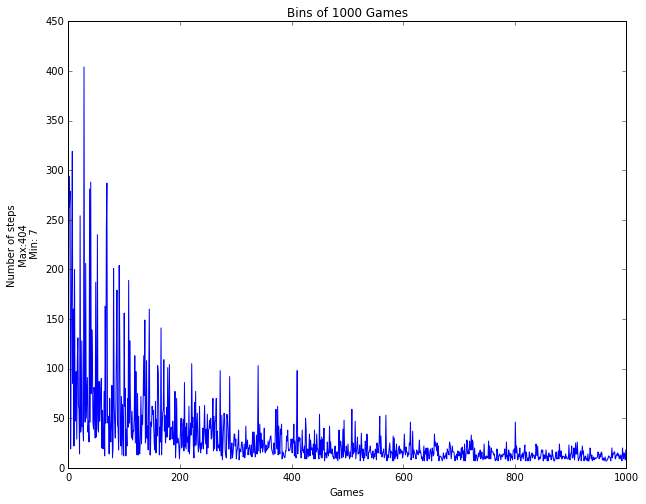

In [49]:
def plot():
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import AnchoredText

    fig = plt.figure(figsize=(10 ,8))
    plt.plot(stepsToGoal)
    plt.ylabel('Number of steps\n Max:{:d} \n Min: {:d}'.format(max(stepsToGoal),min(stepsToGoal) ))
    plt.xlabel('Bins of {:d} Games'.format(1))
    plt.xlabel('Games')
    plt.title('Bins of {:d} Games'.format(len(stepsToGoal)))
    plt.show()
plot()

In [50]:
#without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

def testQ(Q, maxSteps, validMovesF, makeMoveF, winnerF=winner, st=[[1,2,3], [], []]):
    import copy
    import numpy as np
    state=st
    win=False
    path=[]
    for step in range(maxSteps):
        while not win:            
            path.append(state)
            move=[]
            validMovesList = validMovesF(state)

            Qs = np.array([Q.get(tuple(stateMoveTuple(state, m)), 0)  for m in validMovesList]) 
            move = validMovesList[np.argmax(Qs)]
            stateNew=makeMoveF(state, move)

            if winnerF(stateNew):  
                path.append(stateNew)
                win = True

            state = copy.deepcopy(stateNew)
    return path         

In [51]:
path = testQ(Q, 20,validMoves,makeMove)

In [52]:
path


[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [53]:
for s in path:
    #print s
    printState(s)
    print

1    
2    
3    
------

     
2    
3   1
------

     
     
3 2 1
------

     
  1  
3 2  
------

     
  1  
  2 3
------

     
     
1 2 3
------

     
    2
1   3
------

    1
    2
    3
------



In [63]:
%run -i A5grader.py


Testing validMoves([[1], [2], [3]])

--- 10/10 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing validMoves([[], [], [1, 2, 3]])

--- 10/10 points. Correctly returned [[3, 1], [3, 2]]

Testing makeMove([[], [], [1, 2, 3]], [3, 2])

--- 10/10 points. Correctly returned [[], [1], [2, 3]]

Testing makeMove([[2], [3], [1]], [1, 2])

--- 10/10 points. Correctly returned [[], [2, 3], [1]]

Testing   Q, steps = trainQ(1000, 0.5, 0.7, validMoves, makeMove).

--- 10/10 points. Q dictionary has correct number of entries.

--- 10/10 points. The mean of the number of steps is 7.357 which is correct.

Testing   path = testQ(Q, 20, validMoves, makeMove).

--- 20/20 points. Correctly returns path of length 8, less than 10.

ArtificcialIntelligence Execution Grade is 80/80

 Remaining 20 points will be based on your text describing the trainQ and test! functions.

ArtificcialIntelligence FINAL GRADE is __/100


## Extra Credit

In [32]:
def printState_4disk(state):
    import copy
    
    stateCopy = copy.deepcopy(state)
    for peg in stateCopy:
        numberDisks=len(peg)
        for pos in range(4-len(peg)):
            peg.insert(pos,' ')
            
    print stateCopy[0][0],stateCopy[1][0],stateCopy[2][0]
    print stateCopy[0][1],stateCopy[1][1],stateCopy[2][1]
    print stateCopy[0][2],stateCopy[1][2],stateCopy[2][2]
    print stateCopy[0][3],stateCopy[1][3],stateCopy[2][3]
    print '------'

In [33]:
state = [[1, 2,3,4], [], []]
printState_4disk(state)

1    
2    
3    
4    
------


In [34]:
#returns list of moves that are valid from state
def validMoves_4disk(state):
    validMoves=[]
    #for each peg 
    for p in range(3):
        if len(state[p])>0:
            for q in range(3):
                if q==p:
                    continue
                else:  
                    if len(state[q])>0 :
                        if state[p][0]< state[q][0]:
                            validMoves.append([p+1,q+1]) 
                    else:
                        validMoves.append([p+1,q+1])
    return validMoves

In [35]:
state = [[3,4], [1], [2]]

validMoves_4disk(state)

[[2, 1], [2, 3], [3, 1]]

In this case, the valid moves that can be perfomed are:
- move the dist 1 to the peg 2
- move the dist 1 to the peg 3
- move the dist 2 to the peg 3

Disk 3 can not be moved to any other peg because the value is greater than the disks in the other pegs.


In [36]:
def makeMove_4disk(state, move):
    import copy
    newState=copy.deepcopy(state)
    disk=move[0]
    peg=move[1]
    del newState[disk-1][0]
    newState[peg-1].insert(0,state[disk-1][0])    
    return newState

In the following example, the disk 1 is moved to peg 3

In [37]:
state = [[1,2], [3], [4]]
print("Initial state")
printState_4disk(state)

print "Valid Moves: ",validMoves_4disk(state)
move=validMoves_4disk(state)[1]
print "Applying move: ",move
newState=makeMove_4disk(state, move)
print ("")
print ("New state", newState)
printState_4disk(newState)



Initial state
     
     
1    
2 3 4
------
Valid Moves:  [[1, 2], [1, 3], [2, 3]]
Applying move:  [1, 3]

('New state', [[2], [3], [1, 4]])
     
     
    1
2 3 4
------


In [38]:
def winner_4disk(state):
    disks_in_right_pos_2=0
    for i in range(4):
        if len(state[2]) ==4 and state[2][i]==i+1:
            disks_in_right_pos_2+=1
    return True if disks_in_right_pos_2 ==4 else  False
            

In the following examples, a goal state is found because all the disks are ordered in the second or third peg.

In [39]:
state = [ [], [],[1,2,3,4]]
printState_4disk(state)
print ("Win state ? ",winner_4disk(state))
     

    1
    2
    3
    4
------
('Win state ? ', True)


In [62]:
Q, stepsToGoal = trainQ(1000, 0.5, 0.7, validMoves_4disk, makeMove_4disk, winner_4disk, [[1,2,3,4],[],[]])
print (stepsToGoal)

[481, 259, 402, 53, 268, 159, 82, 49, 49, 56, 90, 31, 146, 49, 43, 37, 161, 21, 95, 20, 36, 57, 30, 126, 37, 17, 92, 31, 24, 76, 20, 23, 36, 49, 18, 24, 25, 49, 19, 18, 15, 99, 41, 17, 17, 55, 15, 18, 15, 19, 15, 15, 82, 17, 15, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

In [57]:
path = testQ(Q, 20,validMoves_4disk,makeMove_4disk, winner_4disk, [[1,2,3,4],[],[]])

In [58]:
path


[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [1], []],
 [[3, 4], [1], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [59]:
for s in path:
    #print s
    printState_4disk(s)
    print

1    
2    
3    
4    
------

     
2    
3    
4 1  
------

     
     
3    
4 1 2
------

     
     
3   1
4   2
------

     
     
    1
4 3 2
------

     
     
1    
4 3 2
------

     
     
1 2  
4 3  
------

     
  1  
  2  
4 3  
------

     
  1  
  2  
  3 4
------

     
     
  2 1
  3 4
------

     
     
    1
2 3 4
------

     
     
1    
2 3 4
------

     
     
1   3
2   4
------

     
     
    3
2 1 4
------

     
    2
    3
  1 4
------

    1
    2
    3
    4
------



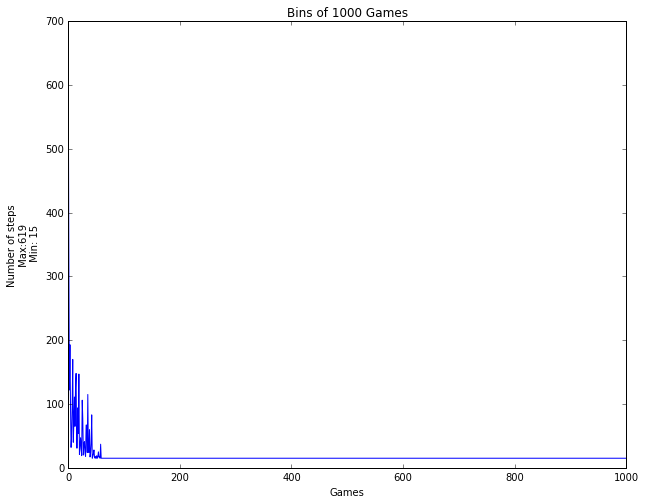

In [61]:
plot()

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path. Include the output from the successful calls to trainQ and testQ.

